Logistic regression using numpy vectorization only for image classification. Inspired by the Nurel networks and deeplearning course by https://www.deeplearning.ai/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Plotting - Settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'bold'

# Sub functions

In [3]:
def w_b_initiation(dim):
    """
    Creates a w vector with zeros
    
    Input : dimesion of the training example (In case of images the nx of flattened 3d array)
    
    Output : w of shape(dim,1)
             b = 0.0   
    
    """
    w = np.zeros(dim) #shape = (nx,1)
    w = w.reshape(dim,1)
    b = 0.0
    return w,b


def Z_calc(w,x,b):
    """
    Calculates z given a input data, feature array and b
    
    Input : x - input data, w - feature array, b - constant
    
    """
    z = np.dot(w.T,x)+b #1*nx dot m*nx
    return z

def sigmoid(z):
    """
    Calculates the sigmoid function value given Z
    
    """
    a = 1/(1+np.exp(-z))
    return a

def cost_func(w,b,X, Y):
    """
    Cost function calculation
    
    """
    z = Z_calc(w,X,b) #shape = (m,nx)
    a = sigmoid(z) #shape = (m,nx)
    m = Y.shape[0]
    #y.reshape(m_train,1)
    
    #a = a.reshape(a.shape[1],1)
    
    y_log_a = Y*np.log(a) #shape = (m,1)*(m,nx) = (m,nx)
    
    y_log_y_a = (1-Y)*(np.log(1-a)) #shape = (m,nx)
    
    cost = -1/m * (np.sum(y_log_a)+np.sum(y_log_y_a)) #scalar
    
    dw = 1/m * np.dot(X,(a-Y).T) #shape nx*m dot m*1 (nx,1)
    
    db = np.sum(a-Y) #shape = scalar
    
    return dw, db, cost
    

def grad_descent(w,b,X,Y,learning_rate = 0.001, num_iter = 100):
    """
    Does gradient descent
    
    """
    costs = np.zeros([1,num_iter])
    i = 0
    for i in range(num_iter):
        
        dw,db,cost = cost_func(w,b,X,Y)
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        #print(cost)
        costs[0,i] = cost
        
    return w,b,cost,costs
        
def predictions(w,b,X):
    """
    Compare the found values wit actual vlaues
    """
    z = Z_calc(w,X,b)
    a = sigmoid(z)
    y_predict = np.zeros([1,a.shape[1]])
    
    for i in range(a.shape[1]):
        if a[0,i]<=0.5:
            y_predict[0,i] = 0
        else:
            y_predict[0,i] = 1
    
            
    return y_predict
    

In [4]:
X = np.random.randn(200,5)

Y = np.array([0,1,0,1,0])
Y = Y.reshape(1,5)

#print(Y)
#print(X)

In [5]:
w,b = w_b_initiation(X.shape[0])
#print("w ={}, b = {}".format(w,b))
print("Shpae(w) = {}".format(w.shape))
z = Z_calc(w,X,b)
print("z = {}".format(z))
a = sigmoid(z)
print("a = {}".format(a))
dw,db,cost = cost_func(w,b,X,Y)
w,b,cost,costs = grad_descent(w,b,X,Y, num_iter=1000)
a_final = predictions(w,b,X)

Shpae(w) = (200, 1)
z = [[0. 0. 0. 0. 0.]]
a = [[0.5 0.5 0.5 0.5 0.5]]


In [6]:
print(a_final)

[[0. 1. 0. 1. 0.]]


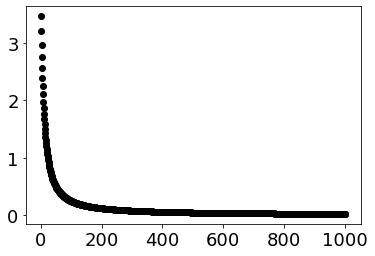

In [7]:
x_nums = np.arange(1,1001)
plt.scatter(x_nums,costs, color = 'black')